# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import os
import citipy

# Import API key
from confv2 import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

print(api_key)

f5ad3ec9eed5d3650422e98f5f5835af


In [13]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

cities

629


['dunedin',
 'kelc',
 'kapaa',
 'ushuaia',
 'yellowknife',
 'havre-saint-pierre',
 'puerto ayora',
 'guna',
 'oil city',
 'lebu',
 'pecos',
 'ukiah',
 'pakokku',
 'sturgis',
 'punta arenas',
 'busselton',
 'jamestown',
 'chiang kham',
 'taolanaro',
 'hithadhoo',
 'rikitea',
 'moose factory',
 'saint-pierre',
 'verkhnetulomskiy',
 'vaini',
 'westport',
 'barentsburg',
 'isangel',
 'vaitupu',
 'hilo',
 'belushya guba',
 'camacha',
 'magelang',
 'shrigonda',
 'srednekolymsk',
 'bengkulu',
 'tabiauea',
 'kijang',
 'mataura',
 'raudeberg',
 'albany',
 'zhezkazgan',
 'dispur',
 'bredasdorp',
 'belmonte',
 'pevek',
 'bluff',
 'katsuura',
 'birao',
 'bridlington',
 'sioux lookout',
 'nhulunbuy',
 'avarua',
 'urubamba',
 'nome',
 'caborca',
 'chicama',
 'petropavlovsk-kamchatskiy',
 'port hardy',
 'constitucion',
 'provideniya',
 'sentyabrskiy',
 'hondo',
 'atuona',
 'saint george',
 'nicoya',
 'illoqqortoormiut',
 'new philadelphia',
 'port alfred',
 'sitka',
 'ulagan',
 'tuktoyaktuk',
 'ribei

In [10]:
# an API call is made up of a couple of things
# 1.) base url -> location, everything after the base url -> 'order' configuration
# 2.) send the order
# 3.) do something with the returned object

# 1.) URL
# parts:            location        |      configuration...                  password                    specifics
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key + "&q=montgomery"
url

# 2.) send the order
montgomery_data = requests.get(url)
montgomery_json = montgomery_data.json()
montgomery_json

{'coord': {'lon': -86.3, 'lat': 32.37},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 80.94,
  'pressure': 1015,
  'humidity': 74,
  'temp_min': 75.99,
  'temp_max': 87.8},
 'visibility': 16093,
 'wind': {'speed': 6.06, 'deg': 352.4},
 'clouds': {'all': 1},
 'dt': 1567039818,
 'sys': {'type': 1,
  'id': 2713,
  'message': 0.0233,
  'country': 'US',
  'sunrise': 1566991064,
  'sunset': 1567037741},
 'timezone': -18000,
 'id': 4076784,
 'name': 'Montgomery',
 'cod': 200}

In [14]:
# Data that we need:
# * Temperature (F) vs. Latitude
# * Humidity (%) vs. Latitude
# * Cloudiness (%) vs. Latitude
# * Wind Speed (mph) vs. Latitude

# 3.) do something with the returned object
name = montgomery_json['name']
max_temp = montgomery_json['main']['temp_max']
humidity = montgomery_json['main']['humidity']
cloudiness = montgomery_json['clouds']['all']
wind_speed = montgomery_json['wind']['speed']
latitude = montgomery_json['coord']['lat']
longitude = montgomery_json['coord']['lon']

montgomery_dictionary = {
    'Name': name,
    'Max Temp': max_temp,
    'Humidity': humidity,
    'Cloudiness': cloudiness,
    'Wind Speed': wind_speed,
    'Latitude': latitude,
    'Longitude': longitude
}

montgomery_dictionary

{'Name': 'Montgomery',
 'Max Temp': 87.8,
 'Humidity': 74,
 'Cloudiness': 1,
 'Wind Speed': 6.06,
 'Latitude': 32.37,
 'Longitude': -86.3}

## Generate Cities List

Perform API Calls
Perform a weather check on each city using a series of successive API calls.
Include a print log of each city as it'sbeing processed (with the city number and city name).

In [6]:
# Get weather data for ALL cities, use for loop and store in list

city_dictionary_list = []

#url = 'https://openweathermap.org/api?'
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = "metric"

for x in range(len(cities)):
    # an API call is made up of a couple of things
    # 1.) base url -> location, everything after the base url -> 'order' configuration
    query_url = f"{url}appid={api_key}&units={units}&q={cities[x]}"
    
    # 2.) send the order, get back something
    response = requests.get(query_url)
    # response[404] means response does not exist. there are many cities 404 errors.
    # check response
    if response.status_code == 404:
        print('No city data for:', cities[x])
    else:
        # 3.) do something with the returned object
        city_json = response.json()
        
        name = city_json['name']
        max_temp = city_json['main']['temp_max']
        humidity = city_json['main']['humidity']
        cloudiness = city_json['clouds']['all']
        wind_speed = city_json['wind']['speed']
        latitude = city_json['coord']['lat']
        longitude = city_json['coord']['lon']

        city_dictionary = {
            'Name': name,
            'Max Temp': max_temp,
            'Humidity': humidity,
            'Cloudiness': cloudiness,
            'Wind Speed': wind_speed,
            'Latitude': latitude,
            'Longitude': longitude
        }

        # add dictionary to list
        city_dictionary_list.append(city_dictionary)
        print('City data found for:', cities[x])

City data found for: mahebourg
No city data for: taolanaro
City data found for: miandrivazo
City data found for: touros
City data found for: punta arenas
City data found for: hermanus
City data found for: nabire
City data found for: laguna
City data found for: hollins
City data found for: noumea
City data found for: georgetown
City data found for: kapaa
City data found for: orissaare
City data found for: khatanga
City data found for: alofi
City data found for: hithadhoo
City data found for: gazojak
City data found for: bluff
City data found for: clyde river
City data found for: victoria
City data found for: busselton
City data found for: beloha
City data found for: qasigiannguit
City data found for: atuona
City data found for: ntcheu
City data found for: kavieng
City data found for: mataura
City data found for: san patricio
City data found for: vao
City data found for: lompoc
City data found for: sol-iletsk
City data found for: loralai
City data found for: manggar
City data found for: 

City data found for: sweetwater
City data found for: flagstaff
City data found for: niquelandia
City data found for: caravelas
City data found for: naze
No city data for: mananara
City data found for: xuddur
City data found for: hatillo
City data found for: vanimo
City data found for: woodward
City data found for: westerland
City data found for: coahuayana
City data found for: manta
City data found for: lagoa
City data found for: annoeullin
City data found for: ucluelet
City data found for: gat
City data found for: katsuura
City data found for: laguna de perlas
City data found for: bathsheba
City data found for: yining
City data found for: morinville
City data found for: cayenne
City data found for: erzin
No city data for: grajau
No city data for: asau
City data found for: kidal
No city data for: khonuu
City data found for: atambua
City data found for: simbahan
City data found for: beringovskiy
City data found for: puerto rondon
City data found for: beira
City data found for: manicore


City data found for: cedar city
No city data for: korla
City data found for: pitimbu
City data found for: vostok
City data found for: yongan
City data found for: westport
City data found for: kafanchan
City data found for: madang
City data found for: pilar
City data found for: novoagansk
City data found for: doka
City data found for: lodwar
No city data for: ngama
City data found for: hay river
City data found for: quang ngai
City data found for: barguzin
City data found for: taitung
City data found for: la sarre
City data found for: nishihara
City data found for: ahipara
City data found for: maryville
City data found for: pangody
City data found for: urubicha
City data found for: gombong
City data found for: gold coast
No city data for: umzimvubu
City data found for: paese
City data found for: souillac
City data found for: rafai
City data found for: guiglo
City data found for: tezu
City data found for: cobija
City data found for: dondo
City data found for: thaton
City data found for: 

In [7]:
city_dictionary_list

[{'Name': 'Mahebourg',
  'Max Temp': 20.56,
  'Humidity': 82,
  'Cloudiness': 40,
  'Wind Speed': 3.1,
  'Latitude': -20.41,
  'Longitude': 57.7},
 {'Name': 'Miandrivazo',
  'Max Temp': 18.15,
  'Humidity': 74,
  'Cloudiness': 0,
  'Wind Speed': 1,
  'Latitude': -19.53,
  'Longitude': 45.46},
 {'Name': 'Touros',
  'Max Temp': 25,
  'Humidity': 78,
  'Cloudiness': 75,
  'Wind Speed': 4.6,
  'Latitude': -5.2,
  'Longitude': -35.46},
 {'Name': 'Punta Arenas',
  'Max Temp': 2,
  'Humidity': 81,
  'Cloudiness': 75,
  'Wind Speed': 12.9,
  'Latitude': -53.16,
  'Longitude': -70.91},
 {'Name': 'Hermanus',
  'Max Temp': 10,
  'Humidity': 72,
  'Cloudiness': 0,
  'Wind Speed': 0.89,
  'Latitude': -34.42,
  'Longitude': 19.24},
 {'Name': 'Nabire',
  'Max Temp': 23.25,
  'Humidity': 77,
  'Cloudiness': 84,
  'Wind Speed': 2.14,
  'Latitude': -3.36,
  'Longitude': 135.5},
 {'Name': 'Laguna',
  'Max Temp': 29,
  'Humidity': 79,
  'Cloudiness': 40,
  'Wind Speed': 4.1,
  'Latitude': 16.17,
  'Longit

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
city_df = pd.DataFrame(city_dictionary_list)
city_df.head()


,Cloudiness,Humidity,Latitude,Longitude,Max Temp,Name,Wind Speed
0,40,82,-20.41,57.70,20.56,Mahebourg,3.10
1,0,74,-19.53,45.46,18.15,Miandrivazo,1.00
2,75,78,-5.20,-35.46,25.00,Touros,4.60
3,75,81,-53.16,-70.91,2.00,Punta Arenas,12.90
4,0,72,-34.42,19.24,10.00,Hermanus,0.89


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

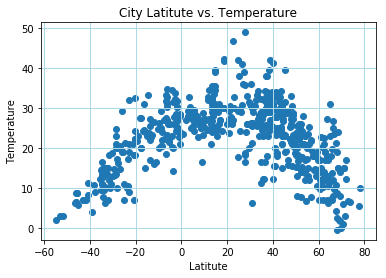

In [43]:
# Grab column data for each
latitude = city_df['Latitude']
temperature = city_df['Max Temp']

# Chart title
plt.title("City Latitute vs. Temperature")
# x label
plt.xlabel("Latitute")
# y label
plt.ylabel("Temperature")
# Make plot

#Creates a grid
plt.grid(color='lightblue', linestyle='-', linewidth=1)

plt.scatter(latitude, temperature)

# Save an image of the chart and print to screen

plt.savefig("CityLatitute&Temp.png", bbox_inches="tight")
plt.show()

#### Latitude vs. Humidity Plot

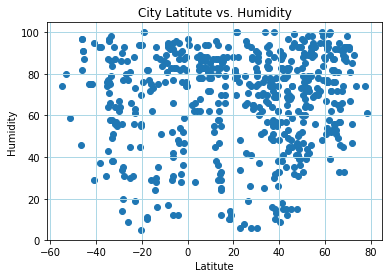

In [44]:
# Grab column data for each
latitude = city_df['Latitude']
humidity = city_df['Humidity']

# Chart title
plt.title("City Latitute vs. Humidity")
# x label
plt.xlabel("Latitute")
# y label
plt.ylabel("Humidity")
# Make plot

#Creates a grid
plt.grid(color='lightblue', linestyle='-', linewidth=1)

plt.scatter(latitude, humidity)

# Save an image of the chart and print to screen

plt.savefig("CityLatitute&Humidity.png", bbox_inches="tight")
plt.show()

#### Latitude vs. Cloudiness Plot

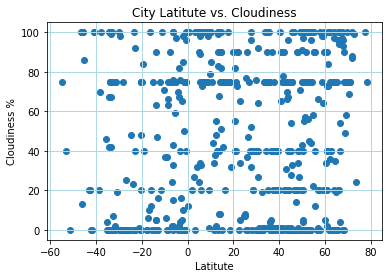

In [45]:
# Grab column data for each
latitude = city_df['Latitude']
cloudiness = city_df['Cloudiness']

# Chart title
plt.title("City Latitute vs. Cloudiness")
# x label
plt.xlabel("Latitute")
# y label
plt.ylabel("Cloudiness %")
# Make plot

#Creates a grid
plt.grid(color='lightblue', linestyle='-', linewidth=1)

plt.scatter(latitude, cloudiness)

# Save an image of the chart and print to screen

plt.savefig("CityLatitute&Cloudiness.png", bbox_inches="tight")
plt.show()

#### Latitude vs. Wind Speed Plot

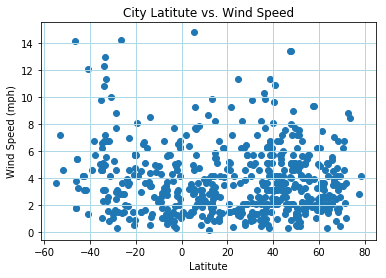

In [46]:
# Grab column data for each
latitude = city_df['Latitude']
wind_speed = city_df['Wind Speed']

# Chart title
plt.title("City Latitute vs. Wind Speed")
# x label
plt.xlabel("Latitute")
# y label
plt.ylabel("Wind Speed (mph)")
# Make plot

#Creates a grid
plt.grid(color='lightblue', linestyle='-', linewidth=1)

plt.scatter(latitude, wind_speed)

# Save an image of the chart and print to screen

plt.savefig("CityLatitute&WindSpeed.png", bbox_inches="tight")
plt.show()